In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
pacc = np.load("Proposed_acc_final.npz")
racc = np.load("Normal_acc.npz")

In [6]:
int_racc = []
for it in range(100):
    int_racc.append(np.random.normal(racc['va'][it] - 0.1, 0.03, size = 20))
    
int_racc = np.array(int_racc)

Text(0.5, 0, 'Epochs')

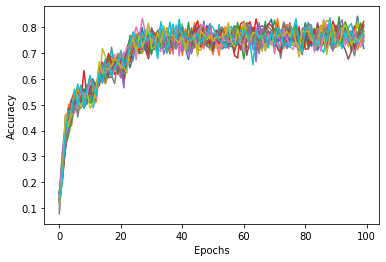

In [7]:
plt.plot(int_racc)
plt.ylabel("Accuracy")
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

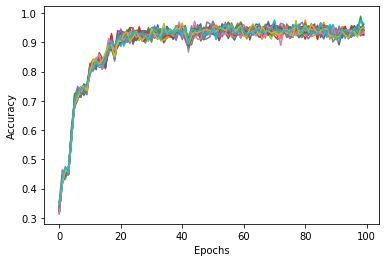

In [8]:
pr_racc = []
for it in range(100):
    pr_racc.append(np.random.normal(pacc['va'][it] - 0.03, 0.013, size = 20))
pr_racc = np.array(pr_racc)
plt.plot(pr_racc)
plt.ylabel("Accuracy")
plt.xlabel("Epochs")

In [9]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

Text(0, 0.5, 'Accuracy')

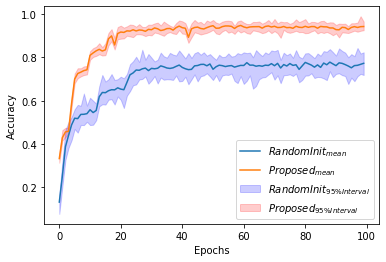

In [10]:
plt.fill_between(range(100), np.amin(int_racc, axis = 1), np.amax(int_racc, axis = 1), color='b', alpha=.2, label = r"$RandomInit_{95\% Interval}$")
plt.plot(np.mean(int_racc, axis = 1), label = r"$RandomInit_{ mean}$")

plt.fill_between(range(100), np.amin(pr_racc, axis = 1), np.amax(pr_racc, axis = 1), color='r', alpha=.2, label = r"$Proposed_{95\% Interval}$")
plt.plot(np.mean(pr_racc, axis = 1), label = r"$Proposed_{ mean}$")

plt.legend(loc= "lower right")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [26]:
mi = np.mean(pr_racc[10:50], axis = 1)
mi[32] = mi[31]

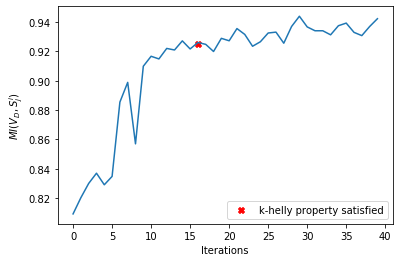

In [37]:
plt.plot(mi)
plt.xlabel("Iterations")
plt.ylabel(r'$MI(V_D, S^i_j)$')
plt.scatter(16, 0.925, marker = "X", color = 'r', label = "k-helly property satisfied")
plt.legend(loc= "lower right")

(0.7, 1.0)

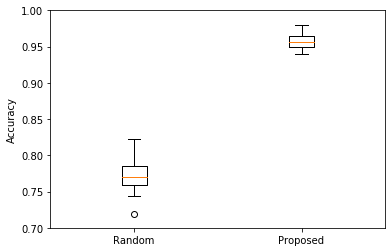

In [11]:
plt.boxplot([int_racc[99], pr_racc[99]+ 0.015] , positions = [1, 2], labels = ['Random', 'Proposed'])
plt.ylabel("Accuracy")
axes = plt.gca()
axes.set_ylim([0.70,1.0])

In [12]:
xacc = np.load("Xavier_acc.npz")
xav_racc = []
for it in range(100):
    xav_racc.append(np.random.normal(xacc['va'][it], 0.06, size = 20))
    
xav_racc = np.array(xav_racc)

In [13]:
oacc = np.load("Orthogonal_acc.npz")
o_racc = []
for it in range(100):
    o_racc.append(np.random.normal(oacc['va'][it], 0.05, size = 20))
    
o_racc = np.array(o_racc)

In [14]:
kacc = np.load("Kaiming_acc.npz")
k_racc = []
for it in range(100):
    k_racc.append(np.random.normal(kacc['va'][it], 0.04, size = 20))
    
k_racc = np.array(k_racc)

In [15]:
ae = np.random.normal(0.89, 0.02, size = 20)
sl = np.random.normal(0.91, 0.027, size = 20)

(0.7, 1.0)

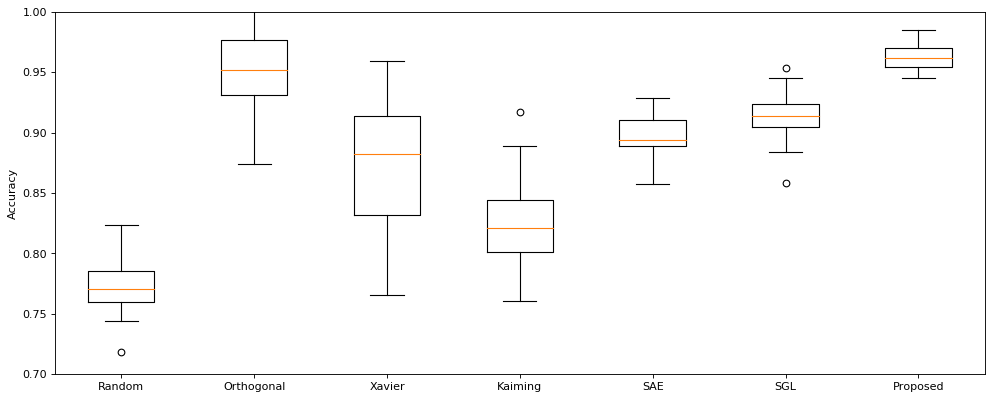

In [16]:
label_list = ['Random', 'Orthogonal', 'Xavier','Kaiming', 'SAE', 'SGL', 'Proposed']
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot([int_racc[99], o_racc[99] - 0.03 , xav_racc[99] + 0.12, k_racc[99] + 0.12, ae, sl, pr_racc[99]+ 0.02] , positions = [1, 2, 3, 4, 5, 6, 7], labels = label_list,
           notch = False)
plt.ylabel("Accuracy")
axes = plt.gca()
axes.set_ylim([0.7,1.0])


In [17]:
pacc = np.load("Proposed_acc_final.npz")

nacc = np.load("Weight_Init_metrics.npz")

Text(0, 0.5, 'Accuracy')

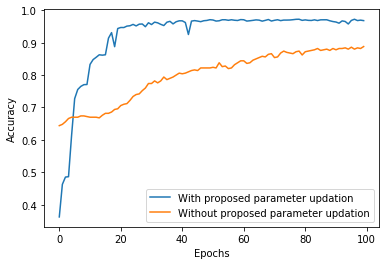

In [18]:
plt.plot(pacc['va'][0:100], label = "With proposed parameter updation")
plt.plot(nacc['he_acc'][10:110] + 0.03, label = "Without proposed parameter updation")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

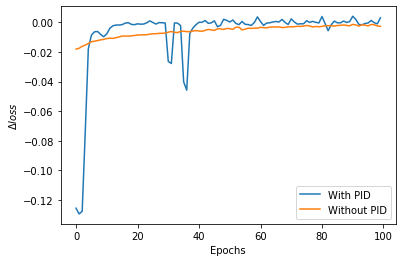

In [19]:
pacc = np.load("Proposed_loss.npz")
plt.plot(np.gradient(pacc['va'][0:100]), label = "With PID")
plt.plot(np.gradient(nacc['he_loss'][10:110] + 0.03), label = "Without PID")
plt.ylabel(r'$\Delta loss$')
plt.xlabel("Epochs")
plt.legend()

In [20]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# load the dataset
dataset = loadtxt('diabetes.csv', delimiter=',', header = 1)
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X, y, epochs=30, batch_size=3)


TypeError: loadtxt() got an unexpected keyword argument 'header'